# PyTorch Computer Vision



## 1 Computer vision libraries in PyTorch

* `torchvision` - base domain library for computer vision
* `torchvision.datasets` - get datasets and data loading function for computer vision
* `torchvision.models` - get pre trained computer vision models that you can leverage for other problems
* `torchvision.transforms` - functions for manipulating vision data to be suitable for use with a ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [72]:
# Import PyTorch
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## 2 Getting a dataset

The dataset we'll be using is fashiomnist from torchvision.datsets

In [73]:
# Set up training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [74]:
len(train_data), len(test_data)

(60000, 10000)

In [75]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [76]:
class_names = train_data.classes
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [77]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [78]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

### Visualizing our data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

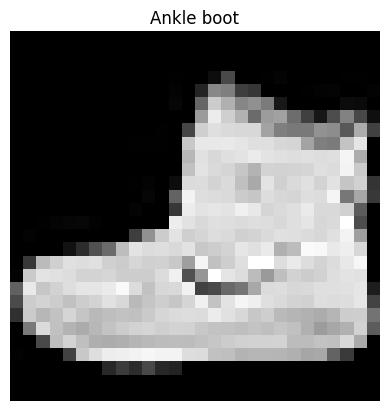

In [79]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

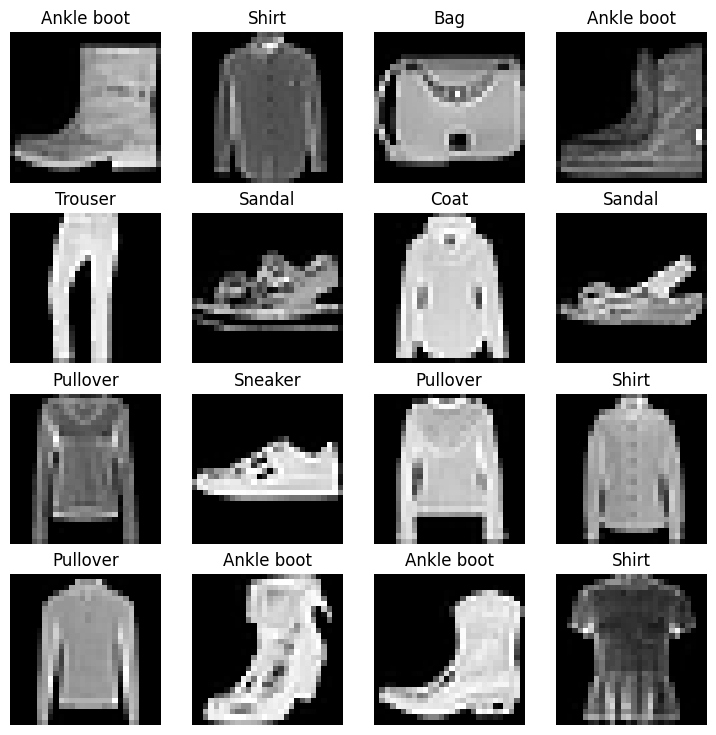

In [80]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


Can these items of clothing be modeled with pure linear lines, or will non-linearity be needed?

## 3 Prepare Data Loader

Right now the data is in the form of PyTorch Datasets

DataLoader turns our datset into a python iterable.
More specificly, we want to turn the data into batches (or mini-batches)

1. It is more computationally efficient.  We break 60,000 images down to 32 images per run.
2. It gives our neural-network more chances to update it's gradients per epoch.

In [81]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [82]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78cf8e5f8f70>,
 <torch.utils.data.dataloader.DataLoader at 0x78cf8e5f9630>)

In [83]:
# Let's examine the dataloader
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x78cf8e5f8f70>, <torch.utils.data.dataloader.DataLoader object at 0x78cf8e5f9630>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [84]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

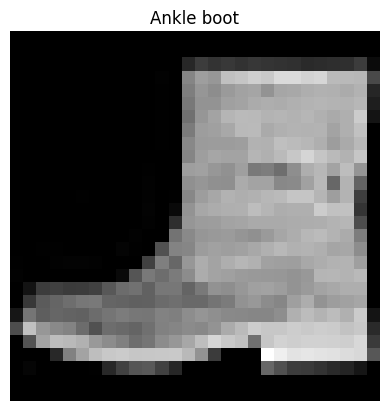

In [85]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_data), size=[1]).item()
img, label = train_data[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## 4 Model 0: Build a baseline model

When starting to build a series of ML modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent experiments.

Start simple, and add complexity

In [86]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x, x.shape

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [87]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2863, 0.0000, 0.0

In [88]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [89]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [90]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Setup loss, optimizer and evaluation metrics

* Loss Function -Since we are working with multi class classification our loss function will be `nn.CrossEntropyLoss`
* Optimizer - We will use `torch.optim.SGD`
* Evaluation metric - we will use accuracy as our evaluation metric

In [91]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [92]:
# Set up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### Creating a function to time our experiments

In [93]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  """Prints difference between start and end time.

  Args:
    start (float): Start time of computation (preferred current time).
    end (float): End time of computation.
    device (str, optional): Device that compute is running on. Defaults to None.
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [94]:
start = timer()
end = timer()
print_train_time(start, end)

Train time on None: 0.000 seconds


4.165099994679622e-05

### Creating a training a loop, and training the model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through the testing batches, perform testing steps, calculate the test loss per batch
4. Print out what the results are
5. Time it all

In [95]:
# Import tqdm for a progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start = timer()

# Set the number of epochs
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n-----")

  train_loss = 0
  # Add a loop to loop through the batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # Foward Pass
    y_pred = model_0(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer Zero grad
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # Optimizer
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  # Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      # Forward Pass
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)

      # Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Divide total test loss by length of test dataloader
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

train_time_end = timer()
model0_total_train_time = print_train_time(start=train_time_start, end=train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.59039 | Test loss: 0.50954 | Test acc: 82.04%
Epoch: 1 
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.47633 | Test loss: 0.47989 | Test acc: 83.20%
Epoch: 2 
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.45503 | Test loss: 0.47664 | Test acc: 83.43%
Train time on None: 26.439 seconds


## 5 Make predictions and get Model 0 results

In [96]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader.

  Args:
    model (torch.nn.Module): A PyTorch trained model
    data_loader (torch.utils.data.DataLoader): The target dataset
    loss_fn (torch.nn.Module): The loss function of the model
    accuracy_fn: An accuracy function
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):


      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}



In [97]:
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 6 Set up device agnostic code


In [98]:
!nvidia-smi

Tue Oct  8 22:12:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0              30W /  70W |    167MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [99]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 7 Building a model with non-linearity

In [100]:
torch.manual_seed(42)

# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)



In [101]:
model_1 = FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [102]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### Functioninizing Training and Testing loops

In [103]:
# Create a function for the training loop

def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device):
  """Performs a training step with a model trying to lear on data_loader"""

  train_loss, train_acc = 0, 0

  model.train()

  model.to(device)

  # Add a loop to loop through the batches
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    # Foward Pass
    y_pred = model(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Optimizer Zero grad
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # Optimizer
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")

In [104]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing step with a model trying to learn on the dataloader"""

  test_loss, test_acc = 0, 0

  # Put the model into eval mode
  model.eval()
  model.to(device)

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      # Forward pass
      test_pred = model(X)

      # Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [105]:
torch.manual_seed(42)

start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_1,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

end_time = timer()
model1_total_train_time = print_train_time(start=start_time, end=end_time)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 1.09199 | Train Acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%
Epoch: 1
------
Train loss: 0.78101 | Train Acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%
Epoch: 2
------
Train loss: 0.67027 | Train Acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%
Train time on None: 30.181 seconds


In [106]:
model_1_results = eval_model(model=model_1.to("cpu"),
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [107]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a COnvolutional Neural Network (CNN)

CNN's are known for their capabilities to find patterns in visual data

https://poloclub.github.io/cnn-explainer

In [108]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website
  """
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [109]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### Stepping through `nn.Conv2d()`

Documentation: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [110]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [111]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3,3), stride=1, padding=1)
test_conv = conv_layer(test_image)
test_conv.shape

torch.Size([10, 64, 64])

### Stepping through `nn.MaxPool2d`

In [112]:
# Print out original shape
print(f"Test image original shape: {test_image.shape}")

# Create a sample nn.MaxPool3d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass datat through the conv_layer first
test_image_through_conv = conv_layer(test_image)
print(f"Test image shape after conv: {test_image_through_conv.shape}")

# Pass data through the max

# Pass the test image through the max pooling layer
test_image_through_conv_max_pool = max_pool_layer(test_image_through_conv)
print(f"Test image shape after max pool: {test_image_through_conv_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image shape after conv: torch.Size([10, 64, 64])
Test image shape after max pool: torch.Size([10, 32, 32])


In [113]:
rand_img_tensor = torch.randn(size=(1, 28, 28))
rand_img_tensor.shape

torch.Size([1, 28, 28])

In [114]:
model_2(rand_img_tensor.unsqueeze(0).to(device))

tensor([[ 0.0426, -0.0984,  0.0621, -0.0358,  0.0184,  0.0271,  0.0163,  0.0133,
         -0.0038, -0.0115]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [115]:
print(10*7*7)
rand_img_tensor.unsqueeze(0).shape

490


torch.Size([1, 1, 28, 28])

In [116]:
# the Flatten of the classifier is outputing 1x490, while the input of the classifier is expecting 10x10 so we need to adjust
model_2(rand_img_tensor.unsqueeze(0).to(device))

tensor([[ 0.0426, -0.0984,  0.0621, -0.0358,  0.0184,  0.0271,  0.0163,  0.0133,
         -0.0038, -0.0115]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Setup a loss function and optimizer for `model 2`

In [117]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### Traiing and testing `model 2`

In [119]:
torch.manual_seed(42)

start_time = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
end_time = timer()
model2_total_train_time = print_train_time(start=start_time, end=end_time)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.32180 | Train Acc: 88.47%
Test loss: 0.33234 | Test acc: 87.94%
Epoch: 1
------
Train loss: 0.30257 | Train Acc: 88.96%
Test loss: 0.31795 | Test acc: 88.39%
Epoch: 2
------
Train loss: 0.28875 | Train Acc: 89.51%
Test loss: 0.30083 | Test acc: 89.41%
Train time on None: 35.715 seconds


In [120]:
# Get model 2 results
model_2_results = eval_model(model=model_2.to("cpu"),
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3008315861225128,
 'model_acc': 89.40694888178913}

In [121]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results
                                ])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.300832,89.406949


In [122]:
compare_results["training_time"] = [model0_total_train_time,
                                    model1_total_train_time,
                                    model2_total_train_time]

In [123]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,26.438736
1,FashionMNISTModelV1,0.685001,75.019968,30.180544
2,FashionMNISTModelV2,0.300832,89.406949,35.714707


Text(0, 0.5, 'Model')

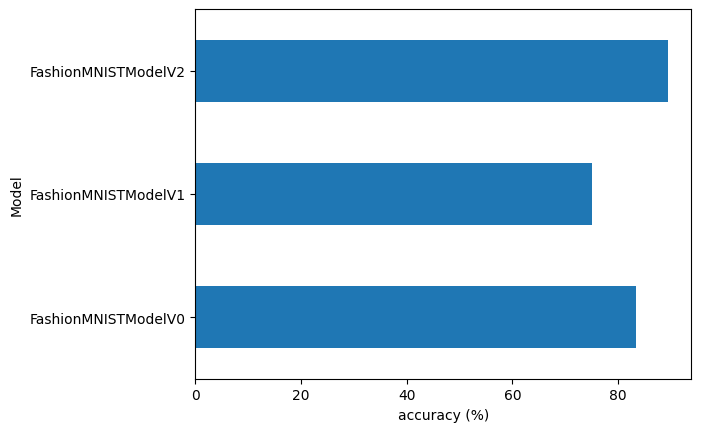

In [124]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("Model")

## Make and evaluate predictions with best model

In [125]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  model.to(device)
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass output raw logits
      pred_logit = model(sample)

      # Get the prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off gpu
      pred_probs.append(pred_prob.cpu())

  # Stack the pred probs to turn list into a tensor
  return torch.stack(pred_probs)

In [126]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

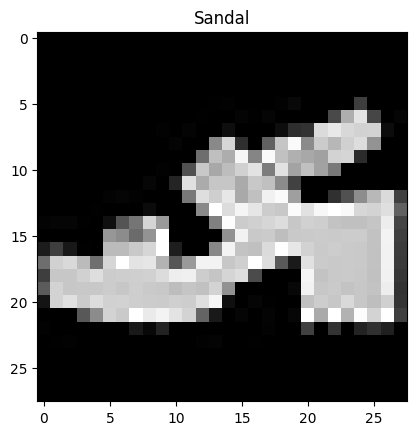

In [127]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [129]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.4660e-08, 2.5022e-09, 2.5629e-09, 1.0304e-08, 5.7101e-11, 9.9999e-01,
         1.6590e-09, 4.0964e-07, 3.2506e-06, 2.2388e-06],
        [2.9043e-02, 6.3282e-01, 3.3667e-03, 1.4105e-01, 2.4506e-02, 1.0843e-04,
         1.6795e-01, 7.7284e-05, 2.1049e-04, 8.7172e-04]])

In [131]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

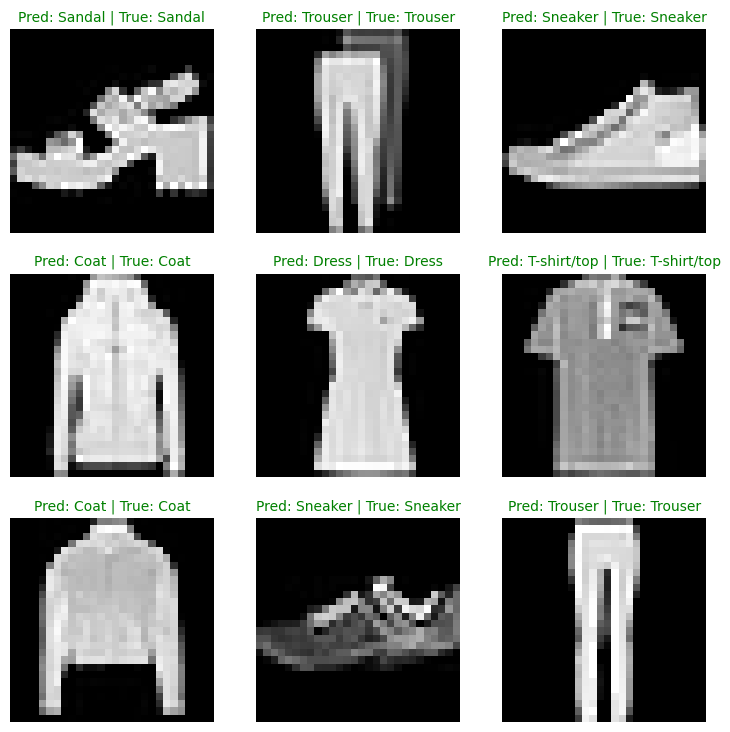

In [133]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncol = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncol, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  true_label = class_names[test_labels[i]]

  title_text = (f"Pred: {pred_label} | True: {true_label}")
  if pred_label == true_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)

## 11 Making a confusion matrix

1. Make predictions with out trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` [Documentation](https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html)
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` [Documentation](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/)

In [134]:
# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
# Concat list of predictions to tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [135]:
len(y_pred_tensor)

10000

In [137]:
!pip install torchmetrics
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 20.6 MB/s eta 0:00:00


In [140]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Set up confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)
confmat_tensor

tensor([[661,   5,  41,  54,  11,   0, 215,   1,  12,   0],
        [ 15, 862,   4,  89,  22,   0,   4,   0,   1,   3],
        [  8,   2, 777,  16, 108,   0,  83,   0,   6,   0],
        [ 28,  11,  25, 850,  40,   0,  40,   0,   4,   2],
        [ 11,   3, 115,  48, 711,   0, 107,   0,   5,   0],
        [ 11,   4,   4,   7,   1, 811,   3,  74,  62,  23],
        [ 87,   4,  96,  60,  71,   0, 667,   0,  15,   0],
        [  1,   2,   0,   0,   0,  28,   0, 923,  10,  36],
        [  4,   3,  16,  15,   9,   6,  33,   7, 905,   2],
        [  2,   1,   0,   2,   0,  17,   4, 115,  10, 849]])

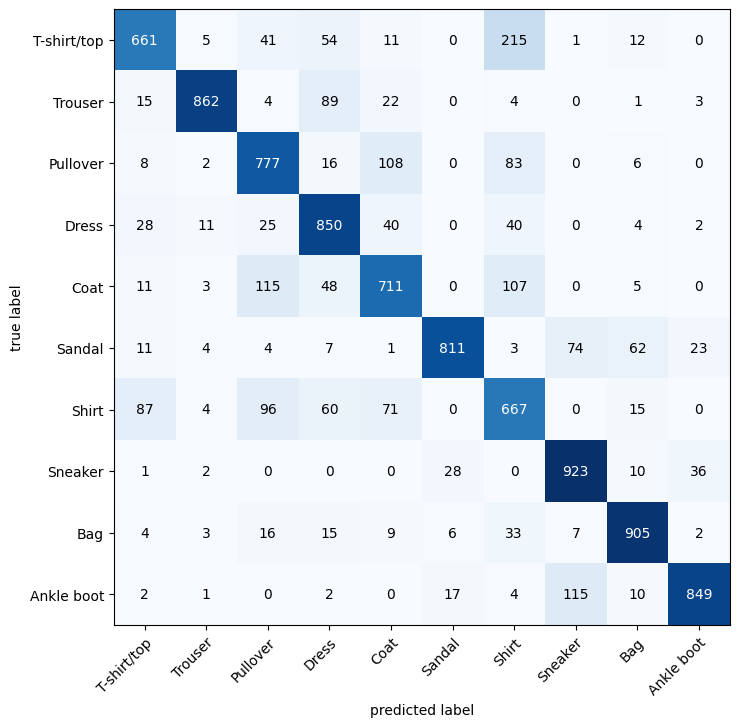

In [143]:
9# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(8,8))